In [19]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

In [20]:
df = pd.read_csv('normalized gpa form.csv')
df.head()

,Gender,Age,Family members count,Current residence,Parents status,Guardian,Fathers education,Mothers education,Guardians monthly income,self_supporting_activity,monthly_income,gpa_software_eng_intro,gpa_formal_methods,gpa_req_eng,gpa_sda,gpa_spm,gpa_sqe,gpa_se_testing,gpa_se_design_patterns,gpa_sc,gpa_ict,gpa_pf,gpa_discrete,gpa_ppit,gpa_oop,gpa_dsa,gpa_se_concepts,gpa_coal,gpa_db,gpa_dip,gpa_algo,gpa_os,gpa_ccn,gpa_cg,gpa_numerical,gpa_webtech,gpa_hci,gpa_gamedev,gpa_automata,gpa_ids,gpa_mobiledev,gpa_ai,gpa_processor_assembly,gpa_compiler_construction,gpa_ml,gpa_infosec,gpa_software_proc_improv,gpa_cv,gpa_data_security,previous sgpa,matric percentage,school scholarship?,intermediate_background,intermediate_percentage,college scholarship?,nts_score,Program,reason_for_program_choice,interest_in_domain,program_satisfaction,current_semester,current_cgpa,uni_scholarship?,paying_fees_status,mode_of_study,subject_difficulty,subject_interest,certificates_or_diploma,library_visits_frequency,study_preference,borrow_books,online_lectures_usage,daily_study_hours,self_study_days,health_status,disability_status,daily_freetime,teacher_methodology_preference,time_with_family_friends,commute_time_to_university,physical_exercise_time,love_travelling,preferred_eating_places,participate_in_cocurriculars,group_study_preference,book_reading_interest,socializing_interest,preferred_spare_time_activities,time_in_spare_activities,family_relationship_quality,internet_access,learning_speed,familysupport_ineducation,graduation_risk_perception,Self-Discipline,Hard Working,Punctuality,Politeness,Team Player,Confidence,Responsible,importance_of_grades,Do you take nutritions.,Do you love sports?,Do you value and have confidence of your opinions?,sleep_time? (7-8 hours)],Do you do self-directed learning?,study burnout,semester success belief,weather impact on focus,study planning,task consistency
0,Male,19,5,Own House,Other,Father,Graduation,Graduation,Between 75k to 100k,Freelancing,Between 10k to 25k,2.7(C),2.3(C -),2.7(C),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,3(B -),2.3(C -),2(D),Didn't studied yet,2.3(C -),3.3(B),Didn't studied yet,Didn't studied yet,3(B -),Didn't studied yet,Didn't studied yet,Didn't studied yet,1.3(E),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,2(D),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,2.60,90.00,Yes,ICS (Physics),70.0,Yes,70.0,Software Engineering,Personal Interests,4.0,4,6 Semester,2.60,No,Yes,Full-time,3,3,No certificate,Sometimes,Physical mode,Never,Always,Between 1 to 2 hours,Before Quiz;Before Exam Day;Saturday,3.0,No,Between 2 to 3 hours,3.0,Less than 1 hour,Less than 20 minutes,Less,4,Outside,Rarely,Rarely,3,Sometimes,Watching Movies | Daramas,Between 2 to 3 hours,Good,Always,Good,Always,Never,Moderate,Moderate,Moderate,Extremely,Extremely,Extremely,Extremely,Moderately important,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,Female,19,3,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 50k to 75k,Freelancing,Between 10k to 25k,3(B -),Didn't studied yet,2.3(C -),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,2.7(C),3(B -),1.3(E),Didn't studied yet,2.7(C),2(D),Didn't studied yet,Didn't studied yet,4(A),Didn't studied yet,Didn't studied yet,Didn't studied yet,4(A),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,1.7(D),Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,Didn't studied yet,2.80,89.00,Yes,FSC (Pre-engineering),83.0,Yes,72.0,Software Engineering,Personal Interests,5.0,5

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Columns: 112 entries, Gender to task consistency
dtypes: float64(8), int64(7), object(97)
memory usage: 842.8+ KB


In [22]:
df.describe()

,Age,Family members count,previous sgpa,matric percentage,intermediate_percentage,nts_score,interest_in_domain,program_satisfaction,current_cgpa,subject_difficulty,subject_interest,health_status,teacher_methodology_preference,love_travelling,book_reading_interest
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,954.000000,963.000000,963.000000,963.000000,963.000000,959.000000,957.000000,963.000000,963.000000
mean,20.326064,5.857736,3.242679,104.584443,136.125625,77.477072,3.865828,3.720665,2.974675,3.366563,3.157840,3.673618,3.128527,3.970924,2.959502
std,2.264160,3.756285,8.383842,121.231487,335.964746,20.721207,1.068889,1.159727,3.184452,1.017315,1.034744,1.056268,1.033534,1.184264,1.305442
min,17.000000,1.000000,0.000100,0.100000,0.100000,0.100000,1.000000,1.000000,0.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.570000,85.000000,76.000000,74.000000,3.000000,3.000000,2.620000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.900000,89.800000,83.000000,80.000000,4.000000,4.000000,2.900000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.280000,93.000000,89.000000,84.000000,5.000000,5.000000,3.210000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,69.000000,108.000000,238.000000,1090.000000,8678.000000,420.000000,5.000000,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
df.isnull().sum()

Gender                     0
Age                        0
Family members count       0
Current residence          0
Parents status             0
                          ..
study burnout              0
semester success belief    0
weather impact on focus    0
study planning             0
task consistency           0
Length: 112, dtype: int64

In [24]:
#Numerical columns
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of numerical variables:', len(numerical_features))

df[numerical_features].head()

Number of numerical variables: 15


,Age,Family members count,previous sgpa,matric percentage,intermediate_percentage,nts_score,interest_in_domain,program_satisfaction,current_cgpa,subject_difficulty,subject_interest,health_status,teacher_methodology_preference,love_travelling,book_reading_interest
0,19,5,2.60,90.00,70.0,70.0,4.0,4,2.60,3,3,3.0,3.0,4,3
1,19,3,2.80,89.00,83.0,72.0,5.0,5,2.50,3,3,4.0,3.0,5,4
2,19,5,2.69,91.00,83.0,82.0,4.0,4,2.62,4,4,3.0,2.0,5,5
3,23,6,2.40,92.17,70.0,72.0,4.0,4,2.67,5,4,4.0,1.0,5,3
4,21,6,3.10,89.00,80.0,68.0,4.0,4,3.00,3,3,5.0,3.0,4,1


In [25]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables count: {}".format(len(discrete_feature)))

Discrete variables count: 10


In [26]:
discrete_feature

['Age',
 'Family members count',
 'interest_in_domain',
 'program_satisfaction',
 'subject_difficulty',
 'subject_interest',
 'health_status',
 'teacher_methodology_preference',
 'love_travelling',
 'book_reading_interest']

In [27]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous variables count: {}".format(len(continuous_feature)))

Continuous variables count: 5


In [28]:
continuous_feature

['previous sgpa',
 'matric percentage',
 'intermediate_percentage',
 'nts_score',
 'current_cgpa']

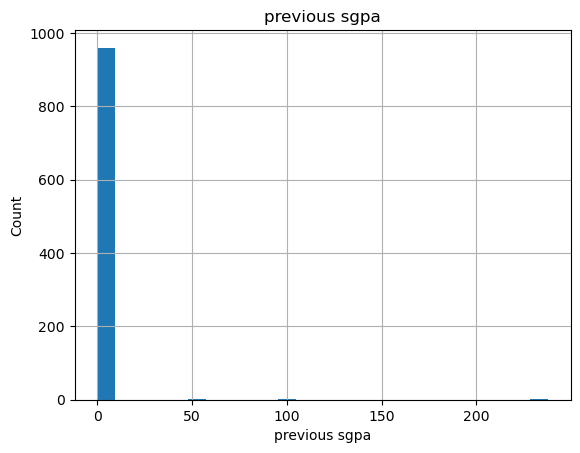

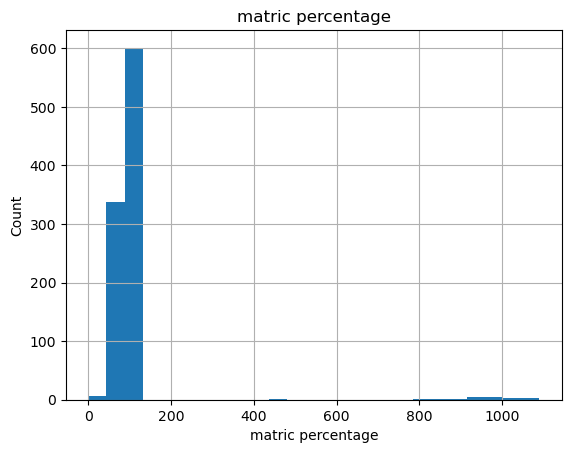

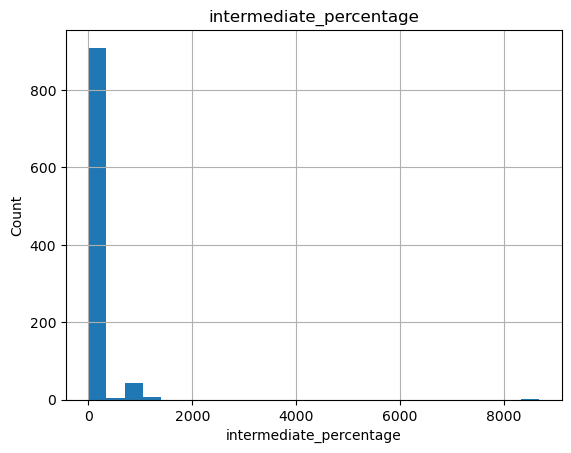

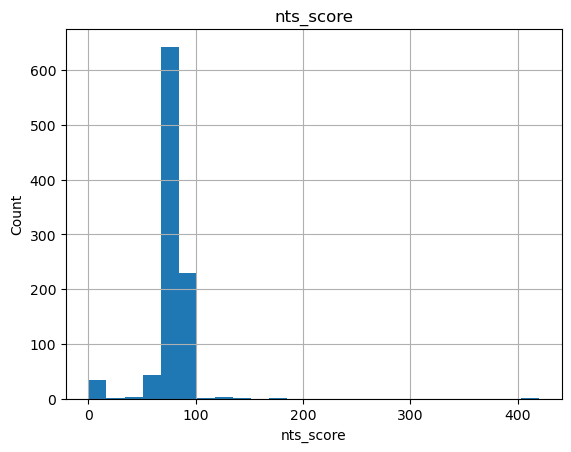

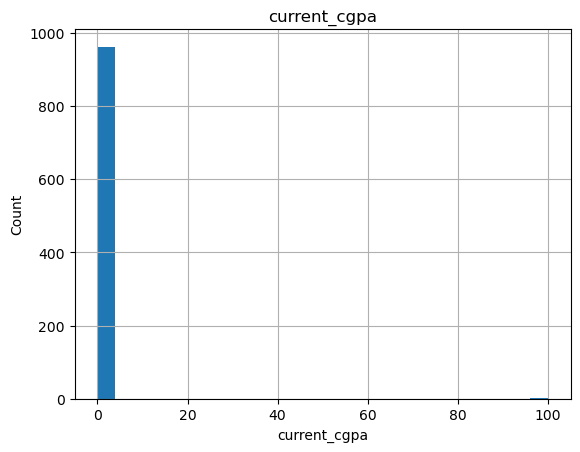

In [29]:
for feature in continuous_feature:
  data=df.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

In [30]:
categorical_features=[feature for feature in df.columns if data[feature].dtype=='O']
categorical_features

['Gender',
 'Current residence',
 'Parents status',
 'Guardian',
 'Fathers education',
 'Mothers education',
 'Guardians monthly income',
 'self_supporting_activity',
 'monthly_income',
 'gpa_software_eng_intro',
 'gpa_formal_methods',
 'gpa_req_eng',
 'gpa_sda',
 'gpa_spm',
 'gpa_sqe',
 'gpa_se_testing',
 'gpa_se_design_patterns',
 'gpa_sc',
 'gpa_ict',
 'gpa_pf',
 'gpa_discrete',
 'gpa_ppit',
 'gpa_oop',
 'gpa_dsa',
 'gpa_se_concepts',
 'gpa_coal',
 'gpa_db',
 'gpa_dip',
 'gpa_algo',
 'gpa_os',
 'gpa_ccn',
 'gpa_cg',
 'gpa_numerical',
 'gpa_webtech',
 'gpa_hci',
 'gpa_gamedev',
 'gpa_automata',
 'gpa_ids',
 'gpa_mobiledev',
 'gpa_ai',
 'gpa_processor_assembly',
 'gpa_compiler_construction',
 'gpa_ml',
 'gpa_infosec',
 'gpa_software_proc_improv',
 'gpa_cv',
 'gpa_data_security',
 'school scholarship?',
 'intermediate_background',
 'college scholarship?',
 'Program',
 'reason_for_program_choice',
 'current_semester',
 'uni_scholarship?',
 'paying_fees_status',
 'mode_of_study',
 'certi

In [32]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [33]:
df

,Gender,Age,Family members count,Current residence,Parents status,Guardian,Fathers education,Mothers education,Guardians monthly income,self_supporting_activity,monthly_income,gpa_software_eng_intro,gpa_formal_methods,gpa_req_eng,gpa_sda,gpa_spm,gpa_sqe,gpa_se_testing,gpa_se_design_patterns,gpa_sc,gpa_ict,gpa_pf,gpa_discrete,gpa_ppit,gpa_oop,gpa_dsa,gpa_se_concepts,gpa_coal,gpa_db,gpa_dip,gpa_algo,gpa_os,gpa_ccn,gpa_cg,gpa_numerical,gpa_webtech,gpa_hci,gpa_gamedev,gpa_automata,gpa_ids,gpa_mobiledev,gpa_ai,gpa_processor_assembly,gpa_compiler_construction,gpa_ml,gpa_infosec,gpa_software_proc_improv,gpa_cv,gpa_data_security,previous sgpa,matric percentage,school scholarship?,intermediate_background,intermediate_percentage,college scholarship?,nts_score,Program,reason_for_program_choice,interest_in_domain,program_satisfaction,current_semester,current_cgpa,uni_scholarship?,paying_fees_status,mode_of_study,subject_difficulty,subject_interest,certificates_or_diploma,library_visits_frequency,study_preference,borrow_books,online_lectures_usage,daily_study_hours,self_study_days,health_status,disability_status,daily_freetime,teacher_methodology_preference,time_with_family_friends,commute_time_to_university,physical_exercise_time,love_travelling,preferred_eating_places,participate_in_cocurriculars,group_study_preference,book_reading_interest,socializing_interest,preferred_spare_time_activities,time_in_spare_activities,family_relationship_quality,internet_access,learning_speed,familysupport_ineducation,graduation_risk_perception,Self-Discipline,Hard Working,Punctuality,Politeness,Team Player,Confidence,Responsible,importance_of_grades,Do you take nutritions.,Do you love sports?,Do you value and have confidence of your opinions?,sleep_time? (7-8 hours)],Do you do self-directed learning?,study burnout,semester success belief,weather impact on focus,study planning,task consistency
0,1,19,5,2,1,1,7,6,15,16,1,4,3,4,9,9,9,9,9,9,5,3,2,9,3,6,9,9,5,9,9,9,0,9,9,9,9,9,9,2,9,9,9,9,9,9,9,9,9,2.60,90.00,1,3,70.0,1,70.0,1,38,4.0,4,5,2.60,0,3,0,3,3,1,4,1,1,0,0,16,3.0,0,1,3.0,8,3,1,4,1,3,8,3,4,174,1,2,0,2,0,1,2,2,2,0,0,0,0,1,4,0,0,3,0,2,0,2,0,2
1,0,19,3,2,2,0,7,6,11,16,1,5,9,3,9,9,9,9,9,9,4,5,0,9,4,2,9,9,8,9,9,9,8,9,9,9,9,9,9,1,9,9,9,9,9,9,9,9,9,2.80,89.00,1,1,83.0,1,72.0,1,38,5.0,5,5,2.50,0,3,0,3,3,2,4,1,3,2,8,5,4.0,0,5,3.0,1,6,1,5,1,4,6,4,2,0,8,3,0,1,0,4,2,3,2,1,2,2,3,4,4,2,0,2,2,2,2,0,2,2
2,0,19,5,2,2,0,7,6,0,76,11,5,2,5,4,5,5,5,5,5,6,6,4,6,6,4,6,2,4,2,2,3,0,5,2,6,3,6,2,1,6,1,1,1,1,6,4,1,2,2.69,91.00,0,3,83.0,0,82.0,1,50,4.0,4,5,2.62,0,3,0,4,4,1,2,1,4,0,6,6,3.0,0,7,2.0,1,6,2,5,1,4,14,5,4,0,0,0,0,2,0,4,0,2,0,0,0,0,0,4,0,4,0,4,0,0,2,4,0,0
3,1,23,6,2,2,0,7,12,11,56,0,4,4,0,9,9,9,9,9,9,6,6,4,9,6,0,9,9,3,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,9,9,9,9,2.40,92.17,1,1,70.0,1,72.0,1,20,4.0,4,5,2.67,0,3,1,5,4,1,3,1,1,0,0,5,4.0,0,6,1.0,4,3,2,5,1,4,0,3,0,174,2,2,0,2,0,4,2,2,2,0,2,2,2,1,4,0,2,0,2,0,0,1,0,2
4,1,21,6,3,2,0,7,12,2,76,11,4,3,8,9,9,9,9,9,9,5,1,4,9,4,4,9,9,6,9,9,5,9,9,9,9,9,9,9,5,9,9,9,9,9,9,9,9,9,3.10,89.00,0,1,80.0,1,68.0,1,20,4.0,4,5,3.00,0,3,1,3,3,1,1,1,1,0,0,5,5.0,0,4,3.0,0,3,1,4,0,0,14,1,4,174,8,0,0,2,0,3,0,2,0,2,0,2,0,3,2,0,0,0,0,3,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,1,22,7,3,2,1,12,12,15,50,7,2,1,5,10,3,0,9,9,9,4,4,3,4,2,2,9,9,3,9,9,1,9,9,0,1,9,1,9,4,9,9,9,9,9,9,9,9,9,2.33,82.00,0,1,73.0,0,59.0,1,20,4.0,4,7,2.33,1,2,0,3,3,1,4,0,3,2,1,5,5.0,0,4,3.0,0,0,3,4,1,3,8,3,3,32,3,1,0,2,0,4,1,2,2,2,2,2,2,2,4,0,0,2,2,2,4,1,2,4
959,1,22,4,2,2,0,13,10,1,52,12,4,0,4,3,9,9,9,9,9,4,4,3,4,5,4,9,9,4,9,9,4,9,9,1,9,9,3,9,3,4,9,9,9,9,9,9,9,9,2.40,78.00,0,1

In [34]:
X = df.drop('current_cgpa', axis=1)
y = df['current_cgpa']

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Reshape the data to fit the CNN input requirements
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [38]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 8.4352 - val_loss: 59.9148
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0179 - val_loss: 59.4206
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.7098 - val_loss: 58.9461
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1483 - val_loss: 58.4890
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9304 - val_loss: 58.0485
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4864 - val_loss: 57.6221
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1335 - val_loss: 57.2134
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.8078 - val_loss: 56.8200
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6183 - val_loss: 56.4414
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1770 - val_loss: 56.0782
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8204 - val_loss: 55.7282
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 

In [41]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.5474 
Test Loss: 49.62998580932617


In [42]:
ypred = model.predict(X_test)
print(model.evaluate(X_train,y_train))
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4265
0.4026551842689514
MSE: 49.6300


In [43]:
r2_score = metrics.r2_score(y_test, ypred)
print('rsquared score =',r2_score)
mse=mean_squared_error(y_test, ypred)
print('mean squared error=',mse)
rmse=np.sqrt(mean_squared_error(y_test, ypred))
print('root mean squared error=',rmse)
mae=mean_absolute_error(y_test, ypred)
print('mean absolute error=',mae)
mape=mean_absolute_percentage_error(y_test, ypred)
print('mean absolute percentage error=',mape)

rsquared score = -0.012178093187415806
mean squared error= 49.629979435774004
root mean squared error= 7.044854820063647
mean absolute error= 1.0248042915027993
mean absolute percentage error= 2.0166678666892586
